# COMP7015: Artificial Intelligence *(Semester 1, 2024/25)*

# Lab 3: Getting Started with PyTorch

In this lab session, we will learn the basic usage of PyTorch, including the basic data structure, operations, autograd, dataset usage, and how to train and evaluate a neural network.


**Course Instructor: Dr. Kejing Yin (Department of Computer Science, Hong Kong Baptist University)**  
**Lab Instructor: Mr. Kenny Cheng (Department of Computer Science, Hong Kong Baptist University)**

*This lab sheet is prepared mainly by Mr. Zhenheng Tang and reviewed by Dr. Kejing Yin*

*This work is licenced under MIT license.*

> MIT License
>
> Copyright (c) 2024 Kejing Yin
>
> Permission is hereby granted, free of charge, to any person obtaining a copy
> of this software and associated documentation files (the "Software"), to deal
> in the Software without restriction, including without limitation the rights
> to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
> copies of the Software, and to permit persons to whom the Software is
> furnished to do so, subject to the following conditions:
>
> The above copyright notice and this permission notice shall be included in all
> copies or substantial portions of the Software.
>
> THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
> IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
> FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
> AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
> LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
> OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
> SOFTWARE.


### Contents
 - Pytorch installation
 - Pytorch Basics: Tensors
 - Pytorch Basics: Operations
 - Pytorch Basics: Autograd
 - Pytorch Basics: Loading Data
 - Implement a neural network
 - Train a neural network
 - Exercises

# 1. Pytorch installation

Go to [pytorch.org](https://pytorch.org/), click `Get Started`. Choose the version based on your platform and hardware.

<div>
    <img width="70%" src="images/pytorch_install.png"/>
</div>




You can go to the documents of Pytroch for learning and searching to use https://pytorch.org/docs/stable/index.html.
Remember to select the Pytorch version that you are using.
![image.png](attachment:image.png)

# 2. Basics Data Structure in PyTorch: Tensors

## 2.1 Define a tensor

A tensor is an algebraic object that describes a multilinear relationship between sets of algebraic objects related to a vector space. For example,

```
a = [-1.3898, -0.8810,  0.9381]
```
is a 1-dimension tensor.

```
b = [[ 0.4409,  0.0908,  0.3443],
    [-2.5567,  0.5856,  0.6679],
    [-0.3731, -1.5730, -0.3018]]
```
is a 2-dimension tensor.

```
c = [[[ 0.1598,  1.0833,  0.1790],
     [-0.5615,  0.5017,  0.3886],
     [-0.9337, -1.1095,  3.0006]],

    [[ 0.6942,  2.0206,  0.3768],
     [-1.6273,  0.3848, -0.8278],
     [-0.0416, -0.0681,  1.1566]],

    [[ 1.0659,  0.8645, -1.6157],
     [-2.2146, -0.0929, -0.8264],
     [-0.4171,  0.2408, -0.7310]]]
```
is a 3-dimension tensor.



Let's look an example:

Firtly, we should import pytorch into our environment.

In [1]:
import numpy as np
import torch

In [2]:
a = torch.tensor([-1.3898, -0.8810,  0.9381])

b = torch.tensor([[ 0.4409,  0.0908,  0.3443],
                  [-2.5567,  0.5856,  0.6679],
                  [-0.3731, -1.5730, -0.3018]])

c = torch.tensor([[[ 0.1598,  1.0833,  0.1790],
                   [-0.5615,  0.5017,  0.3886],
                   [-0.9337, -1.1095,  3.0006]],

                  [[ 0.6942,  2.0206,  0.3768],
                   [-1.6273,  0.3848, -0.8278],
                   [-0.0416, -0.0681,  1.1566]],

                  [[ 1.0659,  0.8645, -1.6157],
                   [-2.2146, -0.0929, -0.8264],
                   [-0.4171,  0.2408, -0.7310]]])

## 2.2 Size/shape of a tensor

We can check dimentions of these tensors by:

In [3]:
print(a.dim(), b.dim(), c.dim())

1 2 3


We can check the shapes of these tensors by:

In [4]:
print(a.shape, b.shape, c.shape)

torch.Size([3]) torch.Size([3, 3]) torch.Size([3, 3, 3])


## 2.3 Device

Tensors may be stored in CPU memory or GPU memory.

You can check and move tensors by following codes:

In [5]:
a.device

device(type='cpu')

Now, we can see tensor ```a``` is stored in CPU memory. **This will work only if you have the CUDA version of pytorch installed.**

Let's move it into GPU memory:

In [6]:
a = a.to("cuda:0")

In [7]:
a.device

device(type='cuda', index=0)

The data in a tensor may have different data types, like the different data types of python and numpy.
We can check data type of tensors by:

In [8]:
a.type()

'torch.cuda.FloatTensor'

## 2.4 Type of a tensor

https://pytorch.org/docs/stable/tensors.html

Now, we change the datatype of a :

In [9]:
a = a.long()
print(a.type())

torch.cuda.LongTensor


In [10]:
a = a.half()
print(a.type())

torch.cuda.HalfTensor


In [11]:
a = a.int()
print(a.type())

torch.cuda.IntTensor


In [12]:
a = a.short()
print(a.type())

torch.cuda.ShortTensor


In [13]:
a = a.double()
print(a.type())

torch.cuda.DoubleTensor


You need to take care of data types. The inconsistent data type may cause error when training neural networks.

There are a few handy functions to generate random tensors / tensors with constant values.

In [14]:
a = torch.randn([3,3, 3])
print(a)

tensor([[[-0.8319,  0.0593,  0.2909],
         [ 0.2267, -1.8111,  0.5026],
         [-2.0015,  1.3053,  1.0075]],

        [[ 0.2905,  0.8590,  0.5774],
         [-1.0151,  1.1284, -0.1816],
         [-0.8843,  1.1338, -1.5419]],

        [[-0.0125, -1.4786, -0.8912],
         [-1.3708,  0.2389,  0.6448],
         [ 1.1406, -1.1185,  1.0439]]])


In [15]:
a = torch.ones([3,3, 3])
print(a)

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])


In [16]:
a = torch.zeros([3,3, 3])
print(a)

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])


## 2.5 Basic Operations in PyTorch

Pytorch supports using the normal math calculations of python, including
```
+, -, *, /, %, **
```


In [17]:
# https://pytorch.org/docs/stable/generated/torch.rand.html
# Returns a tensor filled with random numbers from a uniform distribution on the interval [0, 1)
a = torch.rand(3)

In [18]:
print(a)
print(a + 1)
print(a - 1)
print(a * 3)
print(a / 3)
print(a % 1)
print(a ** 3)

tensor([0.4660, 0.3507, 0.0124])
tensor([1.4660, 1.3507, 1.0124])
tensor([-0.5340, -0.6493, -0.9876])
tensor([1.3980, 1.0522, 0.0373])
tensor([0.1553, 0.1169, 0.0041])
tensor([0.4660, 0.3507, 0.0124])
tensor([1.0121e-01, 4.3142e-02, 1.9286e-06])


For higher-dimension tensor operations, pytorch provides the following functions:

In [19]:
a = torch.rand([2,3])
b = torch.rand([2,3])

In [20]:
print(a)
print()
print(b)

tensor([[0.2120, 0.5407, 0.2742],
        [0.7322, 0.5993, 0.7537]])

tensor([[0.4641, 0.8881, 0.9217],
        [0.1033, 0.3907, 0.0576]])


In [21]:
print('a + b =')
print(a + b)
print()

print('a * b =')
print(a * b)
print()

print('a / b =')
print(a / b)
print()

a + b =
tensor([[0.6761, 1.4288, 1.1959],
        [0.8355, 0.9900, 0.8113]])

a * b =
tensor([[0.0984, 0.4802, 0.2527],
        [0.0756, 0.2341, 0.0434]])

a / b =
tensor([[ 0.4567,  0.6088,  0.2975],
        [ 7.0908,  1.5340, 13.0932]])



```torch.transpose(input, dim0, dim1)``` returns a tensor that is a transposed version of input. The given dimensions dim0 and dim1 are swapped.

https://pytorch.org/docs/stable/generated/torch.transpose.html

In [22]:
print(b)
print()

print(torch.transpose(b, 1, 0))

tensor([[0.4641, 0.8881, 0.9217],
        [0.1033, 0.3907, 0.0576]])

tensor([[0.4641, 0.1033],
        [0.8881, 0.3907],
        [0.9217, 0.0576]])


In [23]:
# this is equivalent to:
print(b.transpose(1, 0))

tensor([[0.4641, 0.1033],
        [0.8881, 0.3907],
        [0.9217, 0.0576]])


In [24]:
c = torch.tensor([[[1, 1], [1, 1]], [[2, 2], [2, 2]]])
print(c)

tensor([[[1, 1],
         [1, 1]],

        [[2, 2],
         [2, 2]]])


In [25]:
c.transpose(1, 0)

tensor([[[1, 1],
         [2, 2]],

        [[1, 1],
         [2, 2]]])

In [26]:
c.transpose(2, 0)

tensor([[[1, 2],
         [1, 2]],

        [[1, 2],
         [1, 2]]])

## 2.6 Matrix Multiplication in PyTorch

The operation `*` is element-wise multiplication:

In [27]:
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float)
y = torch.tensor([[5, 6], [7, 8]], dtype=torch.float)

In [28]:
print(x * y)

tensor([[ 5., 12.],
        [21., 32.]])


For matrix multiplication, you need `matmul`, which returns the matrix product of two tensors.

See https://pytorch.org/docs/stable/generated/torch.matmul.html

In [29]:
x.matmul(y)

tensor([[19., 22.],
        [43., 50.]])

In [30]:
# a handy operator: @
x @ y

tensor([[19., 22.],
        [43., 50.]])

### *Try it out!*

In [31]:
# Try it out!
# Define a tensor t1 which has the shape (3, 4) and a constant value of 8.
# Generate a random tensor t2 which has the shape of (3, 4)


In [32]:
# What is t1 and t2?


In [33]:
# Get another tensor t3 by doing the element-wise multiplication between t1 and t2
# What is the size of t3?


In [34]:
# Get another tensor t4 by doing the matrix product between t1 and the transpose of t2
# What is the size of t4?


## 2.7 Reshape

You can use `reshape` to re-shape tensors:

In [35]:
x = torch.rand(2, 3)
print(x)
print()

print(x.reshape(6, 1))
print()

print(x.view(6, 1))
print()

print(x.view(6))

tensor([[0.4415, 0.7703, 0.7092],
        [0.8571, 0.6731, 0.0472]])

tensor([[0.4415],
        [0.7703],
        [0.7092],
        [0.8571],
        [0.6731],
        [0.0472]])

tensor([[0.4415],
        [0.7703],
        [0.7092],
        [0.8571],
        [0.6731],
        [0.0472]])

tensor([0.4415, 0.7703, 0.7092, 0.8571, 0.6731, 0.0472])


In [36]:
# We can use "-1" to let Pytorch automatically inferred the shape of that dimension
print(x.view(-1))  # 1-d
print()
print(x.view(3, -1)) # 2-d with the second dim automatically inferred

tensor([0.4415, 0.7703, 0.7092, 0.8571, 0.6731, 0.0472])

tensor([[0.4415, 0.7703],
        [0.7092, 0.8571],
        [0.6731, 0.0472]])


In [37]:
x.view(4, -1)  # cannot be reshaped to such size

RuntimeError: shape '[4, -1]' is invalid for input of size 6

# 2. Pytorch Basics: Autograd

Pytorch implemented the automatica gradient derivation for users to obtain the gradients without heavy coding.
The usage is very simple.

You should firstly define tensors with `requires_grad=True`. Then, you can conduct math operations on them, saving results into a new variable. Then use `.backward()` of this new variable. you can obtain the gradients on the all variables that have joined the computation. Let's look at some examples:


In [38]:
a = torch.rand(2)
b = torch.rand(2)
c = (a + b).sum()
c.backward()  # This will raise an error, which is expected.

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

Now, pytorch outputs an error. Because we did not identified the `requires_grad=True`.

In [39]:
a = torch.randn(2, requires_grad=True)
b = torch.randn(2, requires_grad=True)

The attribute `grad` will accumulate the gradients of tensors.

In [40]:
# We did not perform any operations yet, so their gradients are just None
print(a.grad)
print(b.grad)

None
None


In [41]:
# let's do some operations that generates a number (but also a tensor object with size of (1))
c = (a + b).sum()

In [42]:
print(a.grad)
print(b.grad)  # gradient is still zero

None
None


In [43]:
# We need to ask Pytorch to compute graidents for us by doing backward computations.
# See https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html
c.backward()

Now, Pytorch successfully derive the gradients of `sum(a + b)`. Let's check the gradient values for each variable:

In [44]:
print(a.grad)
print(b.grad)

tensor([1., 1.])
tensor([1., 1.])


In [45]:
c.grad  # c is not a *leaf node* in the computational graph, no gradient will be computed.

<ipython-input-45-b6202d86c596>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  c.grad  # c is not a *leaf node* in the computational graph, no gradient will be computed.


Let's look a more complex example:

In [46]:
a = torch.randn(2, requires_grad=True)
b = torch.randn(2)
c = a * b
d = torch.randn(2, requires_grad=True)
e = (c + d).sum()
e.backward()

In [47]:
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)

tensor([1.3679, 0.3096])
None
None
tensor([1., 1.])


<ipython-input-47-21adcc0814ca>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(c.grad)


In the above code, we can see that gradients of c is None. Because c is only an intermediate variable that stores the value of `a*b`. This is called non-leaf nodes in the Pytorch autograd graph. If you are interested in this, you can refer to the following websites to learn more:
https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
https://pytorch.org/docs/stable/notes/autograd.html#:~:text=Autograd%20is%20reverse%20automatic%20differentiation,roots%20are%20the%20output%20tensors.
https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html

**Note: gradient is accumulated**

In [48]:
print(a)
print(a.grad)

tensor([ 0.8714, -1.3551], requires_grad=True)
tensor([1.3679, 0.3096])


In [49]:
x = a.sum()
x.backward()  # should be [1, 1]

In [50]:
print(a.grad)  # not as expected: gardients will not automatically reset to zero. It gets accumulated.

tensor([2.3679, 1.3096])


In [51]:
# reset gradient
a.grad = None

x = a.sum()
x.backward()  # should be [1, 1]

print(a.grad)

tensor([1., 1.])


# 3. Pytorch Basics: Loading Data

In [52]:
import torchvision

The following code will automatically download MNIST from Pytorch, if the path you give does not has a MNIST dataset.

In [53]:
torchvision.datasets.MNIST('./', train=True, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 481kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.36MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.29MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train

Now, the dataset has been downloaded. Thus, the downloading will not be repeated.

In [54]:
mnist = torchvision.datasets.MNIST('./', train=True, download=True)

Let's take a look at some images in it:

In [55]:
from matplotlib import pyplot as plt

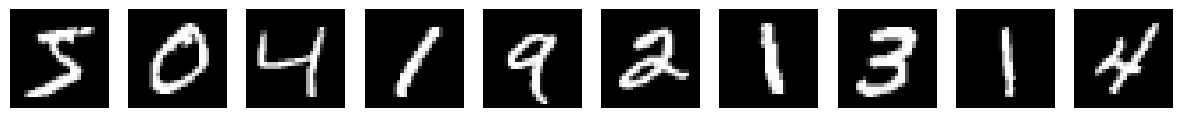

In [56]:
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(mnist[i][0], cmap='gray')
    plt.axis('off')

plt.show()

Firstly, import the data package of Pytorch

Pytorch has already provided some Image Classification datasets. Many machine learning papers use them into experiments to test their models and algorithms. Let's load one example, MNIST dataset.

You can find the introductions of MNIST dataset here:
http://yann.lecun.com/exdb/mnist/

https://en.wikipedia.org/wiki/MNIST_database

https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html

In the above example, we get the image by `mnist[i][0]`, because `mnist[i]` returns a tuple: `(image, label)`. The `label` represents the label of `image`.

In [57]:
for i in range(5):
    print(mnist[i][1])

5
0
4
1
9


Usually, we need to transform the `Image` type into the tensor for training neural network. Pytorch provides the `transforms` for such a transform. And we can use it to conduct some preprocess procedures.

In [58]:
import torchvision.transforms as transforms

In [59]:
MNIST_MEAN = (0.1307,)
MNIST_STD = (0.3081,)

image_size = 28
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=MNIST_MEAN , std=MNIST_STD)
    ])

The above code firstly transform the images into tensors of Pytorch. And then, it normalize the tensors following the mean and std as provided. Let's reload the datasets.

In [60]:
mnist = torchvision.datasets.MNIST('./', transform=train_transform, train=True, download=True)

In [61]:
for i in range(5):
    print(type(mnist[i][0]), mnist[i][0].shape, mnist[i][1])

<class 'torch.Tensor'> torch.Size([1, 28, 28]) 5
<class 'torch.Tensor'> torch.Size([1, 28, 28]) 0
<class 'torch.Tensor'> torch.Size([1, 28, 28]) 4
<class 'torch.Tensor'> torch.Size([1, 28, 28]) 1
<class 'torch.Tensor'> torch.Size([1, 28, 28]) 9


Now, it gives us the `tensor, label` pairs. Let's use the Pytorch dataloader to wrap the dataset. Pytorch dataloader provides some functions to let users more quickly load datas, or randomly perturbe data.

In [63]:
for data in loader:
    print(type(data[0]), data[0].shape, data[1])

<class 'torch.Tensor'> torch.Size([128, 1, 28, 28]) tensor([3, 0, 1, 4, 9, 8, 2, 5, 5, 5, 6, 3, 2, 1, 4, 6, 9, 8, 0, 3, 8, 9, 1, 1,
        3, 6, 4, 8, 1, 4, 5, 2, 3, 7, 5, 7, 4, 2, 2, 3, 5, 0, 2, 4, 0, 5, 7, 5,
        7, 6, 0, 2, 9, 6, 7, 4, 9, 4, 3, 2, 5, 0, 1, 0, 6, 9, 3, 3, 4, 6, 9, 0,
        0, 9, 4, 0, 7, 2, 9, 7, 9, 9, 7, 8, 2, 5, 5, 1, 7, 4, 3, 8, 6, 2, 9, 4,
        2, 6, 0, 9, 0, 6, 5, 9, 8, 1, 7, 7, 6, 2, 0, 7, 1, 6, 2, 5, 8, 6, 3, 1,
        4, 8, 1, 0, 7, 6, 6, 2])
<class 'torch.Tensor'> torch.Size([128, 1, 28, 28]) tensor([6, 1, 5, 7, 3, 0, 6, 7, 1, 6, 3, 5, 4, 9, 5, 8, 3, 0, 0, 9, 8, 7, 8, 2,
        2, 1, 2, 8, 1, 9, 5, 0, 4, 5, 4, 9, 5, 8, 6, 5, 9, 9, 5, 7, 1, 0, 1, 0,
        3, 3, 5, 0, 8, 0, 3, 3, 5, 0, 6, 3, 2, 4, 2, 2, 5, 8, 6, 0, 4, 9, 7, 6,
        3, 1, 1, 9, 3, 3, 3, 3, 8, 6, 3, 0, 9, 0, 1, 4, 2, 8, 7, 9, 3, 8, 6, 1,
        2, 5, 3, 9, 2, 3, 5, 3, 1, 1, 6, 2, 5, 4, 3, 2, 2, 7, 8, 5, 5, 3, 2, 4,
        9, 0, 0, 2, 1, 5, 1, 8])
<class 'torch.Tensor'> torch.S

# 4. Building a neural network
Now, let's implement a simple neural network (NN) by Pytorch.
All NN models are seen as a `torch.nn.Module`. And all layers in this NN are also `torch.nn.Module`. You can refer to  https://pytorch.org/docs/stable/generated/torch.nn.Module.html for more details.

The following codes implement a simple linear model. Usually, we define the model structure in the `__init__` function. And we define the forward process in the `forward` function. The backward process can be done by the Pytorch autograd as mentioned before.

In [64]:
class SimpleLinear(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleLinear, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs


Let's instantiate the NN model. We define the input dimension as the `28*28`， which is the number of features of the mnist data sample.

In [65]:

simplelinear = SimpleLinear(28*28, 10)

Then, we can conduct the forward process with the mnist data and our linear model

In [66]:
output = simplelinear(mnist[0][0].view(-1))
print(output)

tensor([ 0.4074, -0.4852, -1.7659, -0.2129,  1.1740, -0.9588, -0.7638, -0.2424,
         0.7538, -0.7951], grad_fn=<ViewBackward0>)


In the above code, we transpose the data from shape `(1, 28, 28)` into `(784)` by `.view(-1)`. Because the `linear` layer need to receive a 1-dimension or 2-dimension tensor.

You can find details here https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

We can use our defined loader to conveniently load dataset:

In [67]:
for data in loader:
    image, label = data
    output = simplelinear(image.view(image.shape[0], -1))
    print(output)
    print(output.shape)
    break # let's just look at the results in one iteration

tensor([[-0.2501,  1.2880, -0.6478,  ..., -1.1126,  0.5610, -0.0667],
        [ 0.4124,  0.1798, -0.9899,  ..., -0.0152,  0.3328, -0.3179],
        [ 0.2843, -0.4051, -1.1507,  ..., -0.2111,  0.2038, -0.5803],
        ...,
        [-0.1832,  0.0562, -0.5384,  ...,  0.2721,  0.1987, -0.1403],
        [ 0.8682,  0.2267, -0.6841,  ..., -0.5296,  0.5951, -1.0665],
        [-0.5564,  0.6322, -0.9956,  ...,  0.9321,  0.4339, -0.2880]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 10])


In the above code, we use `view(image.shape[0], -1)` instead of `view(-1)`. Because we input data as a batch-style into the model instead of a simple image. Pytorch model can automatically analyse the single-sample or the batch-ssample inputs and conduct forward.

Then, let's implement a more complex Multi-layer perceptron (MLP) model:

In [68]:
import torch.nn.functional as F

class MLP(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.linear1 = torch.nn.Linear(input_dim, 512)
        self.linear2 = torch.nn.Linear(512, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.linear1(x)
        x = F.relu(x)  # applies the nonlinear activation
        outputs = self.linear2(x)
        return outputs


In the above example, except the linear layer, we add the relu activation function after the output of the first linear layer. And we move the reshape process into the forward function for the convenience. Let's use it

In [69]:
mlp = MLP(784, 10)

Use break to save running time...

In [70]:
for i, data in enumerate(loader):
    image, label = data
    output = mlp(image.view(image.shape[0], -1))
    print(output)
    break

tensor([[-0.0253, -0.0618,  0.0886,  ..., -0.2114,  0.2491,  0.1929],
        [-0.3750,  0.0550, -0.0261,  ...,  0.0319,  0.2206,  0.1285],
        [ 0.2518,  0.1964,  0.2403,  ..., -0.0536,  0.0761,  0.0949],
        ...,
        [-0.0487, -0.0211, -0.1044,  ..., -0.4831,  0.1401,  0.3006],
        [-0.4589,  0.1074, -0.1299,  ..., -0.2764,  0.1864, -0.0966],
        [-0.0766,  0.1837,  0.0100,  ...,  0.1573, -0.0558,  0.1865]],
       grad_fn=<AddmmBackward0>)


In [71]:
# We can pick the one with highest scores as the predicted class
output.argmax(dim=1)  # find the index of the maximum value along dimension 1 (the class dimension)

tensor([8, 6, 0, 9, 9, 9, 1, 8, 6, 9, 4, 6, 1, 6, 2, 1, 6, 6, 6, 6, 9, 6, 9, 8,
        6, 9, 9, 2, 8, 0, 6, 6, 2, 6, 9, 9, 6, 6, 1, 8, 5, 8, 9, 6, 1, 9, 1, 6,
        6, 1, 2, 9, 9, 1, 6, 9, 6, 1, 6, 9, 6, 6, 9, 6, 9, 6, 6, 9, 9, 9, 6, 1,
        1, 1, 9, 6, 6, 9, 0, 9, 6, 1, 6, 6, 9, 6, 1, 6, 1, 6, 6, 3, 8, 9, 9, 6,
        9, 6, 0, 6, 1, 6, 9, 9, 6, 9, 9, 9, 1, 1, 2, 6, 6, 6, 9, 9, 1, 6, 8, 6,
        6, 9, 6, 9, 9, 6, 8, 9])

# 5. Train a neural network

Now, let's train a NN model for predicting labels of data.
Before training, there are some other preparing works need to do.
We have defined the dataset and the model structure. We should define an optimizer to guide pytorch how to use gradients to update model parameters. And we should define a loss function to guide pytorch to generate the gradients.

Let's define an optimizer:

In [72]:
optimizer = torch.optim.SGD(mlp.parameters(),
                            lr=0.1,
                            weight_decay=0.0001,  # L2 regularization
                            momentum=0.9)

The above code defines an optimizer, momentum-SGD, to optimize the `mlp`.

`lr=0.1` sets the learning rate as 0.1. `weight_decay=0.0001` sets the weight decay as 0.0001, `momentum=0.9` sets the momentum as 0.9.

You can find more details about thiss optimizer:
https://en.wikipedia.org/wiki/Stochastic_gradient_descent

https://pytorch.org/docs/stable/generated/torch.optim.SGD.html


Now, let's define the cross-entropy loss function:

In [73]:
loss = torch.nn.CrossEntropyLoss()

And we can define the accuracy metric as:

In [74]:
def classification_metric(output, target):
    """Computes the precision@k for the specified values of k"""
    topks = [1, 5]
    maxk = 5
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    metric_stat = {}
    for topk in topks:
        correct_k = correct[:topk].view(-1).float().sum(0, keepdim=True)
        metric_stat["Acc{}".format(topk)] = correct_k.mul_(100.0 / batch_size).item()
    return metric_stat

In [75]:
torch.argmax(output, dim=1)==label

tensor([False, False, False, False, False, False, False, False, False,  True,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
         True, False, False, False, False, False,  True, False, False, False,
        False,  True, False,  True, False, False, False, False,  True, False,
        False, False,  True, False, False, False, False, False,  True, False,
        False, False, False, False, False, False,  True,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True, False,  True, False, False, False,
        False, False, False, False,  True, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True, False,  True, False,  True, False, False])

Now, we can begin to train our mlp model:

In [76]:
mlp.train()  # set to training mode

iters = 0   # total number of iterations
for epoch in range(2):
    for i, data in enumerate(loader):
        iters += 1
        image, label = data
        optimizer.zero_grad()  # reset gradient of parameters to be optimzied

        output = mlp(image)  # forward pass: generate prediction
        new_loss = loss(output, label)  # forward pass: compute loss
        new_loss.backward()  # backward pass: compute gradients
        optimizer.step()  # update parameters

        output_class = output.argmax(dim=1)
        correct_samples = (output_class == label).sum().item()
        acc = correct_samples / label.shape[0]

        if iters % 100 == 0:
            print(f"Iteration: {iters}, loss is : {new_loss.item()}, Acc for this batch: {acc:.3f}")

Iteration: 100, loss is : 0.22432838380336761, Acc for this batch: 0.938
Iteration: 200, loss is : 0.1790991574525833, Acc for this batch: 0.930
Iteration: 300, loss is : 0.09816092997789383, Acc for this batch: 0.953
Iteration: 400, loss is : 0.1116049513220787, Acc for this batch: 0.969
Iteration: 500, loss is : 0.10325805097818375, Acc for this batch: 0.961
Iteration: 600, loss is : 0.10744055360555649, Acc for this batch: 0.945
Iteration: 700, loss is : 0.1336688995361328, Acc for this batch: 0.969
Iteration: 800, loss is : 0.04544815421104431, Acc for this batch: 0.992
Iteration: 900, loss is : 0.07810362428426743, Acc for this batch: 0.977


In [82]:
# If GPU is available. If GPU is not available in your machine, this will raise error.

mlp.cuda()  # move the model to GPU

optimizer = torch.optim.SGD(mlp.parameters(),
                            lr=0.1,
                            weight_decay=0.0001,  # L2 regularization
                            momentum=0.9)

mlp.train()  # set to training mode

iters = 0   # total number of iterations
for epoch in range(2):
    for i, data in enumerate(loader):
        iters += 1
        image, label = data

        image = image.cuda()  # move data to GPU
        label = label.cuda()  # move data to GPU

        optimizer.zero_grad()  # reset gradient of parameters to be optimzied

        output = mlp(image)  # forward pass: generate prediction
        new_loss = loss(output, label)  # forward pass: compute loss
        new_loss.backward()  # backward pass: compute gradients
        optimizer.step()  # update parameters

        output_class = output.argmax(dim=1)
        correct_samples = (output_class == label).sum().item()  # .item() covers a tensor to a number
        acc = correct_samples / label.shape[0]

        if iters % 100 == 0:
            print(f"Iteration: {iters}, loss is : {new_loss.item()}, Acc for this batch: {acc:.3f}")

Iteration: 100, loss is : 0.032764408737421036, Acc for this batch: 0.992
Iteration: 200, loss is : 0.03745558485388756, Acc for this batch: 0.992
Iteration: 300, loss is : 0.0062540746293962, Acc for this batch: 1.000
Iteration: 400, loss is : 0.023077357560396194, Acc for this batch: 0.992
Iteration: 500, loss is : 0.019038042053580284, Acc for this batch: 0.992
Iteration: 600, loss is : 0.026016101241111755, Acc for this batch: 0.984
Iteration: 700, loss is : 0.09356296807527542, Acc for this batch: 0.977
Iteration: 800, loss is : 0.04081892967224121, Acc for this batch: 0.977
Iteration: 900, loss is : 0.049486007541418076, Acc for this batch: 0.992


Now we can make predictions for test set.

In [107]:
# set train=False to load the test set
mnist_test = torchvision.datasets.MNIST('./', transform=train_transform, train=False, download=True)
loader_test = torch.utils.data.DataLoader(mnist_test, batch_size=128, shuffle=False)  # shuffle does not matter for test

In [87]:
mlp.eval()  # set the model to evaluation mode

correct_samples = 0
total_samples = 0

with torch.no_grad(): # no need to compute gradient in testing
    for i, data in enumerate(loader_test):
        image, label = data
        image, label = image.cuda(), label.cuda()

        output = mlp(image)  # generate prediction

        output_class = output.argmax(dim=1)
        correct_samples += (output_class == label).sum()
        total_samples += label.shape[0]
    acc = correct_samples / total_samples

    print(f"Acc for test set: {acc:.3f}")

Acc for test set: 0.992


We can see the loss values decreases, the top1 and top5 accuracy increase with the training goes on.

# 6. Exercises

## Q1. Define a logistic regression for bianry classifiction using PyTorch and train it using MNIST dataset.

In [96]:
class BinaryLogisticRegression(torch.nn.Module):
    def __init__(self, input_dim):
        super(BinaryLogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.linear(x)
        outputs = F.sigmoid(x)  # convert to probability score between zero and one.
        outputs = outputs.squeeze(1)
        return outputs

In [97]:
# If GPU is available. If GPU is not available in your machine, this will raise error.

lr = BinaryLogisticRegression(input_dim=784)
lr.cuda()  # move the model to GPU

loss_function = torch.nn.BCELoss()

optimizer = torch.optim.SGD(lr.parameters(),
                            lr=0.1,
                            weight_decay=0.0001,  # L2 regularization
                            momentum=0.9)

lr.train()  # set to training mode

iters = 0   # total number of iterations
for epoch in range(2):
    for i, data in enumerate(loader):
        iters += 1
        image, label = data

        image = image.cuda()  # move data to GPU
        label = label.cuda()  # move data to GPU
        label = (label==0).float()  # in this question, we predict if the digit is 0.

        optimizer.zero_grad()  # reset gradient of parameters to be optimzied

        output = lr(image)  # forward pass: generate prediction
        new_loss = loss_function(output, label)  # forward pass: compute loss
        new_loss.backward()  # backward pass: compute gradients
        optimizer.step()  # update parameters

        output_class = (output>0.5).float()
        correct_samples = (output_class == label).sum().item()  # .item() covers a tensor to a number
        acc = correct_samples / label.shape[0]

        if iters % 100 == 0:
            print(f"Iteration: {iters}, loss is : {new_loss.item()}, Acc for this batch: {acc:.3f}")

Iteration: 100, loss is : 0.00882663857191801, Acc for this batch: 0.992
Iteration: 200, loss is : 0.10022996366024017, Acc for this batch: 0.992
Iteration: 300, loss is : 0.0024551795795559883, Acc for this batch: 1.000
Iteration: 400, loss is : 0.005655363667756319, Acc for this batch: 1.000
Iteration: 500, loss is : 0.0016432723496109247, Acc for this batch: 1.000
Iteration: 600, loss is : 0.07394933700561523, Acc for this batch: 0.992
Iteration: 700, loss is : 0.07184233516454697, Acc for this batch: 0.977
Iteration: 800, loss is : 0.09050212800502777, Acc for this batch: 0.969
Iteration: 900, loss is : 0.06916046142578125, Acc for this batch: 0.984


## Q2. Modify the evaluation codes to also compute Recall and Precision scores.

In [108]:
lr.eval()  # set the model to evaluation mode

predictions = []
labels = []

with torch.no_grad(): # no need to compute gradient in testing
    for i, data in enumerate(loader_test):
        image, label = data
        image, label = image.cuda(), label.cuda()
        label = (label==0).float()

        output = lr(image)  # generate prediction
        output = (output>0.5).float()

        predictions.append(output)
        labels.append(label)
predictions = torch.cat(predictions)
labels = torch.cat(labels)

In [109]:
tp = ((predictions==1) & (labels==1)).sum()
fp = ((predictions==1) & (labels==0)).sum()
tn = ((predictions==0) & (labels==0)).sum()
fn = ((predictions==0) & (labels==1)).sum()

In [111]:
recall = tp / (tp + fn)
precision = tp / (tp+fp)

In [112]:

print(recall, precision)

tensor(0.9510, device='cuda:0') tensor(0.9648, device='cuda:0')


## Q3. Train an MLP with two hidden layers (hidden size=256) using FashionMNIST dataset. Compute the Accuracy score.

https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [122]:
mnist_train = torchvision.datasets.FashionMNIST('./', transform=train_transform, train=True, download=True)
loader_train = torch.utils.data.DataLoader(mnist, batch_size=128, shuffle=True)

mnist_test = torchvision.datasets.FashionMNIST('./', transform=train_transform, train=False, download=True)
loader_test = torch.utils.data.DataLoader(mnist_test, batch_size=128, shuffle=False)  # shuffle does not matter for test

class MLP(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.linear1 = torch.nn.Linear(input_dim, 256)
        self.linear2 = torch.nn.Linear(256, 256)
        self.linear3 = torch.nn.Linear(256, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.linear1(x)
        x = F.relu(x)  # applies the nonlinear activation
        x = F.relu(self.linear2(x))
        outputs = self.linear3(x)
        return outputs

In [123]:
mlp = MLP(784, 10)
loss_function = torch.nn.CrossEntropyLoss()

mlp.train()  # set to training mode

iters = 0   # total number of iterations
for epoch in range(2):
    for i, data in enumerate(loader_train):
        iters += 1
        image, label = data
        optimizer.zero_grad()  # reset gradient of parameters to be optimzied

        output = mlp(image)  # forward pass: generate prediction
        new_loss = loss_function(output, label)  # forward pass: compute loss
        new_loss.backward()  # backward pass: compute gradients
        optimizer.step()  # update parameters

        output_class = output.argmax(dim=1)
        correct_samples = (output_class == label).sum().item()
        acc = correct_samples / label.shape[0]

        if iters % 100 == 0:
            print(f"Iteration: {iters}, loss is : {new_loss.item()}, Acc for this batch: {acc:.3f}")

Iteration: 100, loss is : 2.306692123413086, Acc for this batch: 0.102
Iteration: 200, loss is : 2.3001785278320312, Acc for this batch: 0.094
Iteration: 300, loss is : 2.3085522651672363, Acc for this batch: 0.086
Iteration: 400, loss is : 2.3081557750701904, Acc for this batch: 0.109
Iteration: 500, loss is : 2.308980941772461, Acc for this batch: 0.125
Iteration: 600, loss is : 2.316230535507202, Acc for this batch: 0.125
Iteration: 700, loss is : 2.312741756439209, Acc for this batch: 0.094
Iteration: 800, loss is : 2.3083040714263916, Acc for this batch: 0.141
Iteration: 900, loss is : 2.317862033843994, Acc for this batch: 0.102


In [125]:
mlp.eval()  # set the model to evaluation mode

correct_samples = 0
total_samples = 0

with torch.no_grad(): # no need to compute gradient in testing
    for i, data in enumerate(loader_test):
        image, label = data

        output = mlp(image)  # generate prediction

        output_class = output.argmax(dim=1)
        correct_samples += (output_class == label).sum()
        total_samples += label.shape[0]
    acc = correct_samples / total_samples

    print(f"Acc for test set: {acc:.3f}")

Acc for test set: 0.061


The accuracy is low. You can increase the number of epochs to improve the accuracy.